In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Load dataset

In [14]:
data_set = pd.read_csv('kidney_disease.csv')
print(data_set.shape)
f_title = data_set.columns

(400, 26)


## Visualize Correlation Between Features

In [3]:
# print(f_labels)
# correlation_matrix = data_set[f_title].corr()
# print(correlation_matrix)
# plt.figure(figsize=(16,12))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.title("correlation_matrix")
# plt.show()

# my code .............................. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming data_set is your DataFrame and f_title is the list of column names you're interested in
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

# Loop through the columns in f_title and encode categorical data
for col in f_title:
    if data_set[col].dtype == 'object':  # Check if the column is categorical
        data_set[col] = label_encoder.fit_transform(data_set[col])

# Now, calculate the correlation matrix
correlation_matrix = data_set[f_title].corr()

# Print and plot the correlation matrix
print(correlation_matrix)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


NameError: name 'data_set' is not defined

## Split Dependent and Independent Data

In [24]:
x = data_set.iloc[:,:-1]
y = data_set.iloc[:, -1]
print(x.shape, y.shape)

(400, 25) (400,)


# Feature Selection

## 1. Recursive Feature Elimination (RFE):

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC

# estimator = SVC(kernel="linear")
# selector = RFE(estimator, n_features_to_select=15, step=1)  # Choose a target number of features
# selector = selector.fit(x, y)

# # Get the selected features
# selected_features = selector.support_
# x_selected = x.iloc[:, selected_features]
# print(x_selected.shape)

# my code .............................. 

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Assuming x (features) and y (target) are your data and labels

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

# Apply label encoding to each column that is categorical
for col in x.select_dtypes(include=['object']).columns:
    x[col] = label_encoder.fit_transform(x[col])

# Now, we can apply RFE
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)  # Choose a target number of features
selector = selector.fit(x, y)

# Get the selected features
selected_features = selector.support_

# Create the new feature set with only selected features
x_selected = x.iloc[:, selected_features]
print(x_selected.shape)


AttributeError: 'RFE' object has no attribute 'support_'

## Visualize Selected Features 

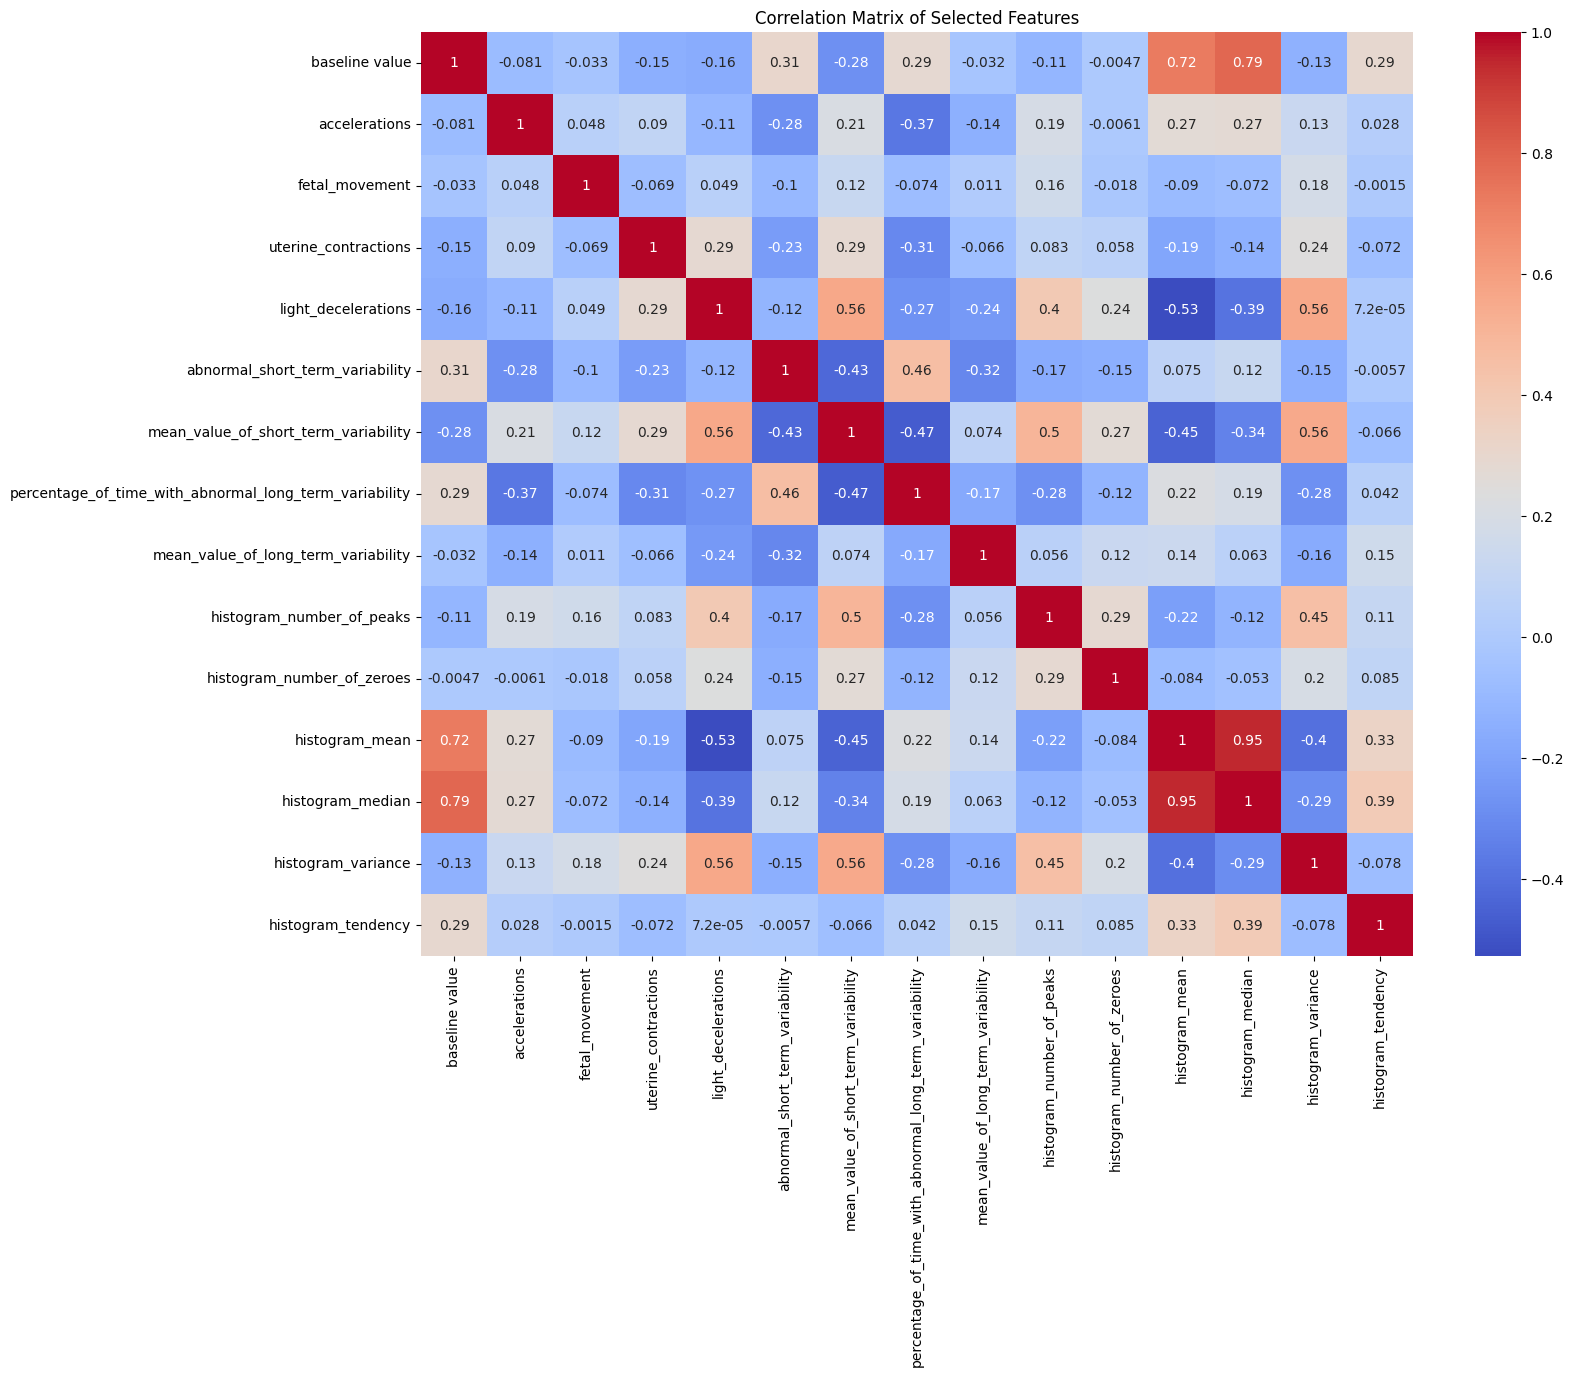

In [6]:
# print(f_labels)
correlation_matrix = x_selected.corr()
# print(correlation_matrix)
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()

## Split Train Test dataset

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# print(x_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# print(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(1488, 21) (638, 21) (1488,) (638,)


In [8]:
x_train_fs,x_test_fs,y_train_fs,y_test_fs = train_test_split(x_selected,y,test_size=0.3,random_state=42)
# print(x_train)
scaler = StandardScaler()
x_train_fs = scaler.fit_transform(x_train_fs)
# print(x_train)
x_test_fs = scaler.fit_transform(x_test_fs)
print(x_train_fs.shape,x_test_fs.shape,y_train_fs.shape,y_test_fs.shape)

(1488, 15) (638, 15) (1488,) (638,)


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def logistic_regression(_x_train, _x_test, _y_train, _y_test):
    # Setting multi_class='multinomial' to use the softmax approach
    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
    
    # Train the model
    clf.fit(_x_train, _y_train)
    
    # Make predictions on the test data
    _y_pred = clf.predict(_x_test)

    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred),  classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_lr, conf_matrix_lr, class_report_lr = logistic_regression(x_train, x_test, y_train, y_test)
accuracy_lr_fs, conf_matrix_lr_fs, class_report_lr_fs = logistic_regression(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Accuracy Fs: {accuracy_lr_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Confusion Matrix fs:\n", conf_matrix_lr_fs)
print("Classification Report:\n", class_report_lr)
print("Classification Report fs:\n", class_report_lr_fs)

Accuracy: 0.88
Accuracy Fs: 0.89
Confusion Matrix:
 [[470  19   7]
 [ 30  61  10]
 [  3   5  33]]
Confusion Matrix fs:
 [[469  17  10]
 [ 31  63   7]
 [  3   5  33]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       496
         2.0       0.72      0.60      0.66       101
         3.0       0.66      0.80      0.73        41

    accuracy                           0.88       638
   macro avg       0.77      0.79      0.77       638
weighted avg       0.88      0.88      0.88       638

Classification Report fs:
               precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       496
         2.0       0.74      0.62      0.68       101
         3.0       0.66      0.80      0.73        41

    accuracy                           0.89       638
   macro avg       0.78      0.79      0.78       638
weighted avg       0.88      0.89      0.88       638



C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## SVM

In [10]:
from sklearn.svm import SVC

def svm(_x_train, _x_test, _y_train, _y_test):
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(_x_train, _y_train)
    # Predicting the Test set results
    _y_pred = classifier.predict(_x_test)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)
    
accuracy_svm, conf_matrix_svm, class_report_svm = svm(x_train, x_test, y_train, y_test)
accuracy_svm_fs, conf_matrix_svm_fs, class_report_svm_fs = svm(x_train_fs, x_test_fs, y_train_fs, y_test_fs)
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Accuracy fs: {accuracy_svm_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Confusion Matrix fs:\n", conf_matrix_svm_fs)
print("Classification Report:\n", class_report_svm)
print("Classification Report fs:\n", class_report_svm_fs)

Accuracy: 0.90
Accuracy fs: 0.89
Confusion Matrix:
 [[471  20   5]
 [ 23  69   9]
 [  1   6  34]]
Confusion Matrix fs:
 [[469  22   5]
 [ 29  66   6]
 [  1   6  34]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       496
         2.0       0.73      0.68      0.70       101
         3.0       0.71      0.83      0.76        41

    accuracy                           0.90       638
   macro avg       0.80      0.82      0.81       638
weighted avg       0.90      0.90      0.90       638

Classification Report fs:
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       496
         2.0       0.70      0.65      0.68       101
         3.0       0.76      0.83      0.79        41

    accuracy                           0.89       638
   macro avg       0.80      0.81      0.80       638
weighted avg       0.89      0.89      0.89       638



## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(_x_train, _x_test, _y_train, _y_test):
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(_x_train, _y_train)
    _y_pred = regressor.predict(_x_test)
    _y_pred = np.round(_y_pred, decimals=0)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

accuracy_rf, conf_matrix_rf, class_report_rf = random_forest(x_train, x_test, y_train, y_test)
accuracy_rf_fs, conf_matrix_rf_fs, class_report_rf_fs = random_forest(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Accuracy fs: {accuracy_rf_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Confusion Matrix fs:\n", conf_matrix_rf_fs)
print("Classification Report:\n", class_report_rf)
print("Classification Report_fs:\n", class_report_rf_fs)

Accuracy: 0.91
Accuracy fs: 0.90
Confusion Matrix:
 [[471  20   5]
 [ 17  75   9]
 [  1   6  34]]
Confusion Matrix fs:
 [[471  23   2]
 [ 20  71  10]
 [  2   6  33]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       496
         2.0       0.74      0.74      0.74       101
         3.0       0.71      0.83      0.76        41

    accuracy                           0.91       638
   macro avg       0.80      0.84      0.82       638
weighted avg       0.91      0.91      0.91       638

Classification Report_fs:
               precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       496
         2.0       0.71      0.70      0.71       101
         3.0       0.73      0.80      0.77        41

    accuracy                           0.90       638
   macro avg       0.80      0.82      0.81       638
weighted avg       0.90      0.90      0.90       638



## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(_x_train, _x_test, _y_train, _y_test):
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(_x_train, _y_train)
    
    _y_pred = naive_bayes_model.predict(_x_test)
    _y_pred = np.round(_y_pred, decimals=0)
    
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

accuracy_gnb, conf_matrix_gnb, class_report_gnb = naive_bayes(x_train, x_test, y_train, y_test)
accuracy_gnb_fs, conf_matrix_gnb_fs, class_report_gnb_fs = naive_bayes(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_gnb:.2f}")
print(f"Accuracy fs: {accuracy_gnb_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_gnb)
print("Confusion Matrix fs:\n", conf_matrix_gnb_fs)
print("Classification Report fs:\n", class_report_gnb_fs)

Accuracy: 0.79
Accuracy fs: 0.81
Confusion Matrix:
 [[466   0  30]
 [ 90   0  11]
 [  3   0  38]]
Confusion Matrix fs:
 [[409  62  25]
 [ 17  83   1]
 [  2  13  26]]
Classification Report fs:
               precision    recall  f1-score   support

         1.0       0.96      0.82      0.89       496
         2.0       0.53      0.82      0.64       101
         3.0       0.50      0.63      0.56        41

    accuracy                           0.81       638
   macro avg       0.66      0.76      0.70       638
weighted avg       0.86      0.81      0.83       638



C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Deep Learning Algorithm 

## extract the predict value

In [13]:
def extract_predict(y_pred):
    y_pred = np.round(y_pred, decimals=0)
    y_p = []
    for y in y_pred:
        if y[0]==1:
            y_p.append(1)
        elif y[1] == 1:
            y_p.append(2)
        else:
            y_p.append(3)
    return y_p

## Feedforward Neural Network (FNN)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.backend import clear_session

def fnn(_x_train, _x_test, _y_train, _y_test):
    clear_session()
    # Define the model
    model = Sequential()
    model.add(Dense(64, input_dim=_x_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))  # For multi-class classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(_x_train, (_y_train-1), epochs=20, batch_size=16, validation_split=0.3, verbose=1)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(_x_test, _y_test-1)
    print(f'Test accuracy: {test_acc}')
    
    # Make predictions
    _y_pred = model.predict(_x_test)
    _y_pred = extract_predict(_y_pred)

    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_fnn, conf_matrix_fnn, class_report_fnn = fnn(x_train, x_test, y_train, y_test)
accuracy_fnn_fs, conf_matrix_fnn_fs, class_report_fnn_fs = fnn(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_fnn:.2f}")
print(f"Accuracy fs: {accuracy_fnn_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_fnn)
print("Confusion Matrix fs:\n", conf_matrix_fnn_fs)
print("Classification Report:\n", class_report_fnn)
print("Classification Report fs:\n", class_report_fnn_fs)

C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6114 - loss: 0.9059 - val_accuracy: 0.8479 - val_loss: 0.4534
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8513 - loss: 0.4406 - val_accuracy: 0.8881 - val_loss: 0.3175
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8841 - loss: 0.3317 - val_accuracy: 0.8904 - val_loss: 0.2882
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8632 - loss: 0.3411 - val_accuracy: 0.9016 - val_loss: 0.2672
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8898 - loss: 0.2664 - val_accuracy: 0.8971 - val_loss: 0.2571
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8759 - loss: 0.2966 - val_accuracy: 0.9038 - val_loss: 0.2549
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9090 - loss: 0.2548 - val_accuracy: 0.8993 - val_loss: 0.2518
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8999 - loss: 0.2412 - val_accuracy: 0.8993 - val_loss

C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5820 - loss: 0.9030 - val_accuracy: 0.8523 - val_loss: 0.4381
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8454 - loss: 0.4571 - val_accuracy: 0.8770 - val_loss: 0.3190
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.3420 - val_accuracy: 0.8904 - val_loss: 0.2853
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8626 - loss: 0.3367 - val_accuracy: 0.8926 - val_loss: 0.2663
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8977 - loss: 0.2756 - val_accuracy: 0.8971 - val_loss: 0.2567
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8897 - loss: 0.2854 - val_accuracy: 0.8926 - val_loss: 0.2542
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8819 - loss: 0.2590 - val_accuracy: 0.9016 - val_loss: 0.2467
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8809 - loss: 0.2664 - val_accuracy: 0.8971 - val_loss

## 1D Convolutional Neural Network (1D CNN)

In [15]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def cnn(_x_train, _x_test, _y_train, _y_test):
    clear_session()
    # Define the 1D CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(_x_train.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    cnn_model.fit(_x_train, _y_train-1, epochs=20, batch_size=32, validation_split=0.3, verbose=1)
    
    # Evaluate the model
    cnn_test_loss, cnn_test_acc = cnn_model.evaluate(_x_test, _y_test-1)
    print(f'CNN Test accuracy: {cnn_test_acc}')
    # Make predictions
    _y_pred = cnn_model.predict(_x_test)
    _y_pred = extract_predict(_y_pred)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_cnn, conf_matrix_cnn, class_report_cnn = cnn(x_train, x_test, y_train, y_test)
accuracy_cnn_fs, conf_matrix_cnn_fs, class_report_cnn_fs = cnn(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_cnn:.2f}")
print(f"Accuracy fs: {accuracy_cnn_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_cnn)
print("Confusion Matrix fs:\n", conf_matrix_cnn_fs)
print("Classification Report:\n", class_report_cnn)
print("Classification Report fs:\n", class_report_cnn_fs)

C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7071 - loss: 0.8717 - val_accuracy: 0.8098 - val_loss: 0.5087
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8213 - loss: 0.5067 - val_accuracy: 0.8792 - val_loss: 0.3578
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8497 - loss: 0.4157 - val_accuracy: 0.8926 - val_loss: 0.3174
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8575 - loss: 0.3854 - val_accuracy: 0.8926 - val_loss: 0.2982
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8597 - loss: 0.3686 - val_accuracy: 0.8926 - val_loss: 0.2944
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8644 - loss: 0.3387 - val_accuracy: 0.8949 - val_loss: 0.2796
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8705 - loss: 0.3215 - val_accuracy: 0.8971 - val_loss: 0.2850
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8675 - loss: 0.3192 - val_accuracy: 0.9016 - va

C:\Users\bayaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7230 - loss: 0.8224 - val_accuracy: 0.8166 - val_loss: 0.5574
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8311 - loss: 0.5433 - val_accuracy: 0.8770 - val_loss: 0.4257
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8231 - loss: 0.4586 - val_accuracy: 0.8792 - val_loss: 0.3499
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8574 - loss: 0.4297 - val_accuracy: 0.8859 - val_loss: 0.3243
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8513 - loss: 0.3686 - val_accuracy: 0.9016 - val_loss: 0.3102
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8774 - loss: 0.3171 - val_accuracy: 0.9016 - val_loss: 0.2964
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8839 - loss: 0.3261 - val_accuracy: 0.9060 - val_loss: 0.2912
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8853 - loss: 0.3131 - val_accuracy: 0.8971 - val_lo

## Confusion Matrixs

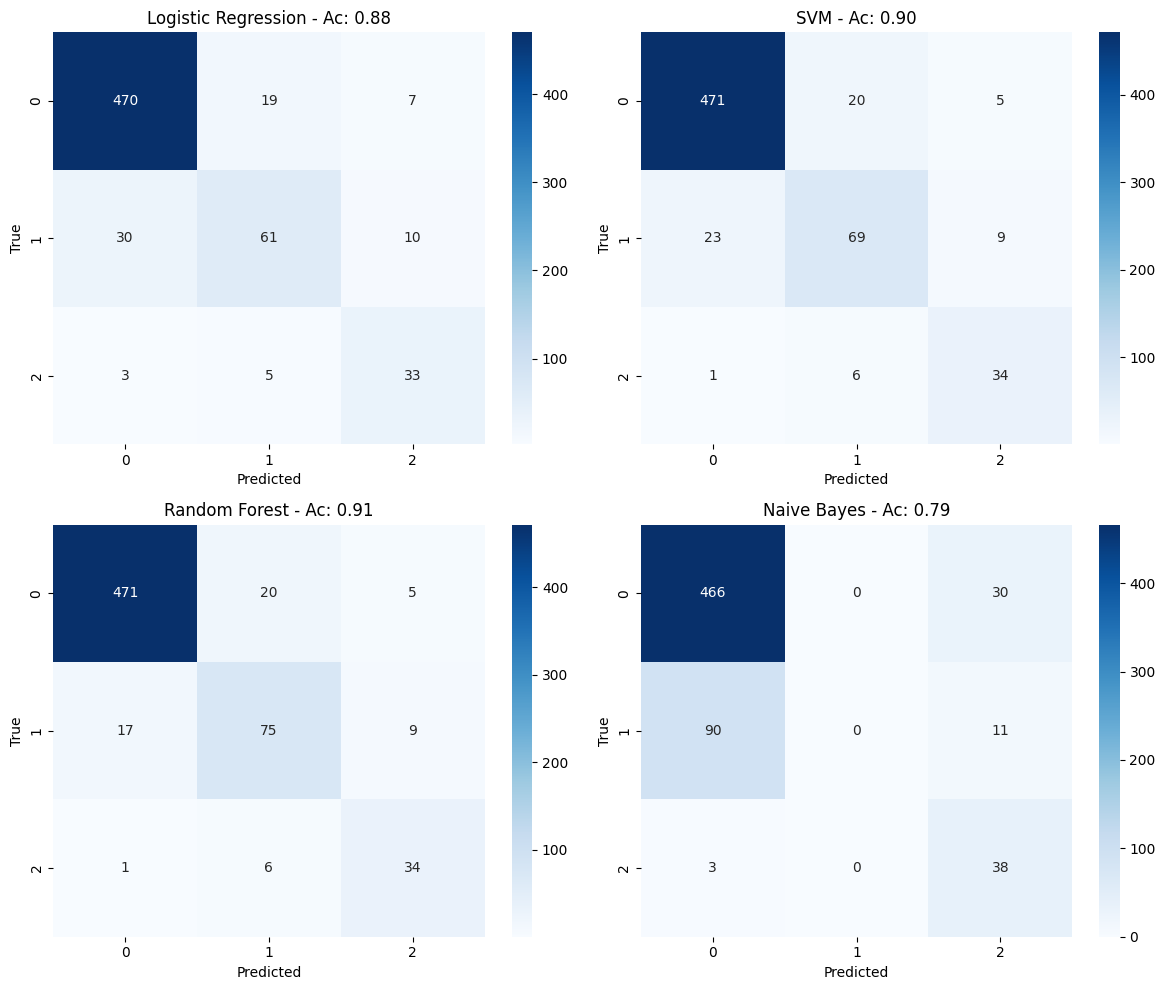

In [16]:
matrices = [conf_matrix_lr, conf_matrix_svm, conf_matrix_rf, conf_matrix_gnb]  # Replace with your confusion matrices
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_gnb]
titles = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']

# Create a figure with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()


for ax, cm, title, accuracy in zip(axs, matrices, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} - Ac: {accuracy:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

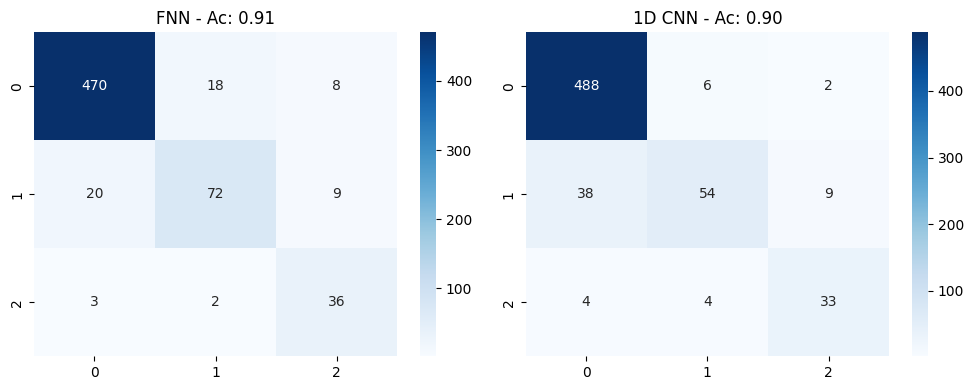

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

matrices = [conf_matrix_fnn, conf_matrix_cnn]  # Replace with your confusion matrices
accuracies = [accuracy_fnn, accuracy_cnn]
titles = ['FNN', '1D CNN']

for ax, cm, title,accuracy in zip(axs, matrices, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} - Ac: {accuracy:.2f}')

plt.tight_layout()
plt.show()

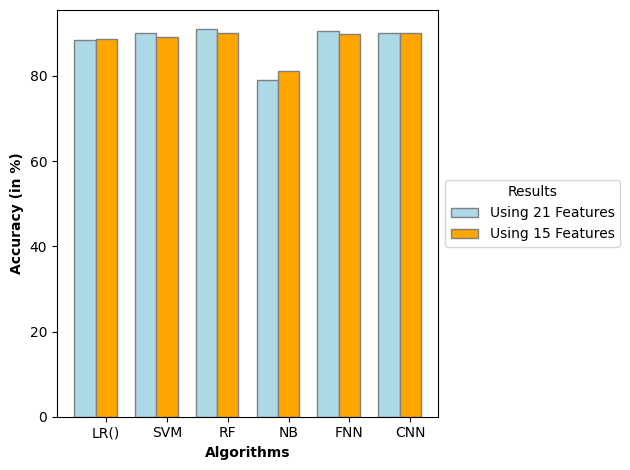

In [18]:
# Data for the chart
algorithms = ['LR()', 'SVM', 'RF', 'NB', 'FNN', 'CNN']
shade1 = [accuracy_lr*100, accuracy_svm*100, accuracy_rf*100, accuracy_gnb*100, accuracy_fnn*100, accuracy_cnn*100]
shade2 = [accuracy_lr_fs*100, accuracy_svm_fs*100, accuracy_rf_fs*100, accuracy_gnb_fs*100, accuracy_fnn_fs*100, accuracy_cnn_fs*100]

# Set the bar width
bar_width = 0.35

# Positions for each bar on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, shade1, color='lightblue', width=bar_width, edgecolor='grey', label='Using 21 Features')
plt.bar(r2, shade2, color='orange', width=bar_width, edgecolor='grey', label='Using 15 Features')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Accuracy (in %)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")

# Adjust the layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()